# Pymaceuticals Inc.
---

### Analysis

- There is a strong linear realtionship between the mouse weight and the tumor volume.

-Mice treated with Capomulin saw a good reduction of tumor volume, along with the fact that there was less variation between the sizes of the tumors over time, it seems it could be a sucessful treatmeant regimen.

-The Capomulin treatment regimen might be a good candidate to study futher because while it shows promise, it might have trouble treating larger mice.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)


mice_results = pd.merge(study_results, mouse_metadata, how = 'left', on = ['Mouse ID'])
# Combine the data into a single dataset

# Display the data table for preview
mice_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Checking the number of mice.
total_mice = len(mice_results['Mouse ID'].unique())
total_mice
#249

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_results[mice_results.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice
#array(['g989'], dtype=object)

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_row_s = mice_results.duplicated(['Mouse ID', 'Timepoint'], keep=False)
bad_mouse_row_s = mice_results['Mouse ID'].isin(duplicate_mice)
mice_results[bad_mouse_row_s] 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_results = mice_results[~bad_mouse_row_s]
clean_mice_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [36]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(clean_mice_results['Mouse ID'].value_counts())
total_mice
#248

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_vol = clean_mice_results.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_vol = clean_mice_results.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor_vol = clean_mice_results.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev_tumor_vol = clean_mice_results.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor_vol = clean_mice_results.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


summary_regimen = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": var_tumor_vol,
    "Tumor Volume Std. Dev.": stdev_tumor_vol,
    "Tumor Volume Std. Err.": sem_tumor_vol
})

summary_regimen



/var/folders/pn/c8dt84bx2r9fbfxb1qyp16k80000gn/T/ipykernel_5612/702222785.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_vol = clean_mice_results.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
/var/folders/pn/c8dt84bx2r9fbfxb1qyp16k80000gn/T/ipykernel_5612/702222785.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_vol = clean_mice_results.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
/var/folders/pn/c8dt84bx2r9fbfxb1qyp16k80000gn/T/ipykernel_5612/702222785.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a f

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_regimen = clean_mice_results.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

summary_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

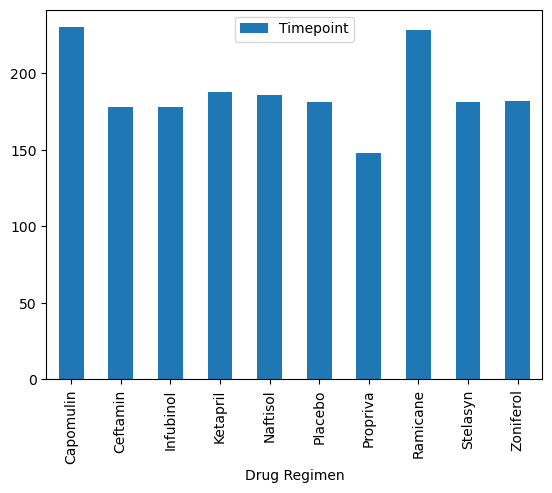

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#total_timepoint = clean_mice_results.groupby('Drug Regimen')['Timepoint'].count()
timepoint_fig = clean_mice_results[['Drug Regimen', 'Timepoint']].groupby('Drug Regimen').count()
timepoint_fig.plot(kind="bar")
plt.show()

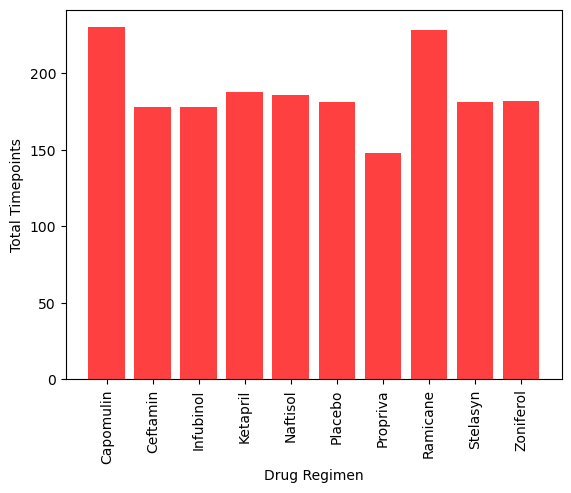

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_timepoint = clean_mice_results.groupby('Drug Regimen')['Timepoint'].count()

x_axis = np.arange(len(total_timepoint))
tick_labels = list(total_timepoint.index)

plt.bar(x_axis, total_timepoint, color='r', alpha=0.75, align='center')
plt.xticks(x_axis, tick_labels, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')
plt.show()

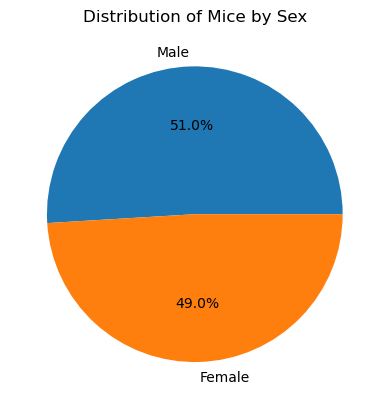

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_by_sex = clean_mice_results['Sex'].value_counts()

mice_by_sex.plot(kind='pie', title='Distribution of Mice by Sex', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

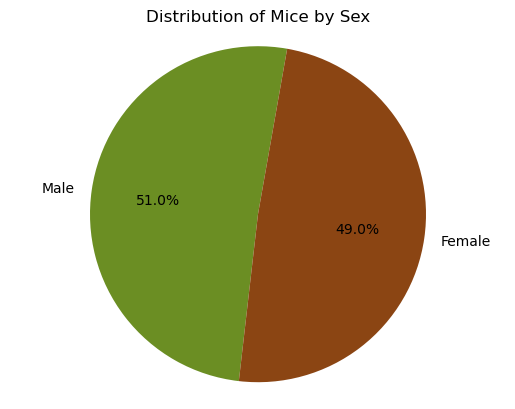

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
colors = ['olivedrab', 'saddlebrown'] 

plt.pie(mice_by_sex, labels=labels, colors = colors, startangle=80, autopct='%.1f%%')
plt.title('Distribution of Mice by Sex')
plt.axis('equal')
plt.show()

In [13]:
## Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_tumor = clean_mice_results.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = max_tumor.merge(clean_mice_results,on=['Mouse ID','Timepoint'],how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volumes = []

 # Locate the rows which contain mice on each drug and get the tumor volumes and add subset

for treatment_regimen in treatment_regimens:
    
    volumes = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == treatment_regimen, 'Tumor Volume (mm3)']
    mean = volumes.mean()
    median = volumes.median()
    var = volumes.var()
    stdev = volumes.std()
    sem = volumes.sem()

    tumor_volumes.append(volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = volumes.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
# Determine outliers using upper and lower bounds   
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]    
    
    if len(outliers) > 0:
        print(f"{treatment_regimen}'s potential outliers: {outliers}") 
    else:
        print(f"{treatment_regimen}'s potential outliers: None")
        

Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: None


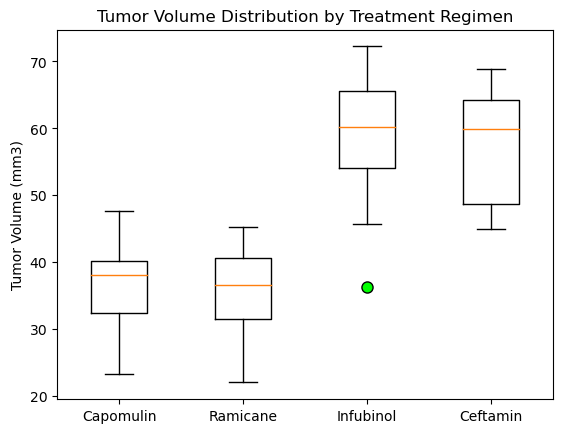

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution by Treatment Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volumes, labels=treatment_regimens, flierprops={'marker': 'o', 'markerfacecolor': 'lime', 'markersize': 8})

plt.show()


## Line and Scatter Plots

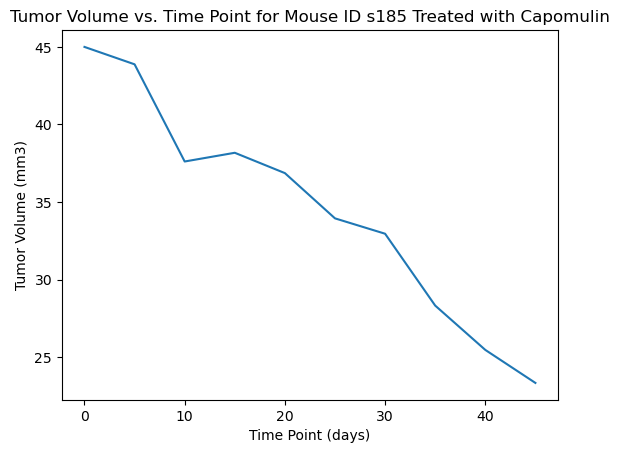

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_mice_results[clean_mice_results['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()[3]
capomulin_data = clean_mice_results[clean_mice_results['Mouse ID'] == capomulin_mouse]

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

plt.title(f"Tumor Volume vs. Time Point for Mouse ID {capomulin_mouse} Treated with Capomulin")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

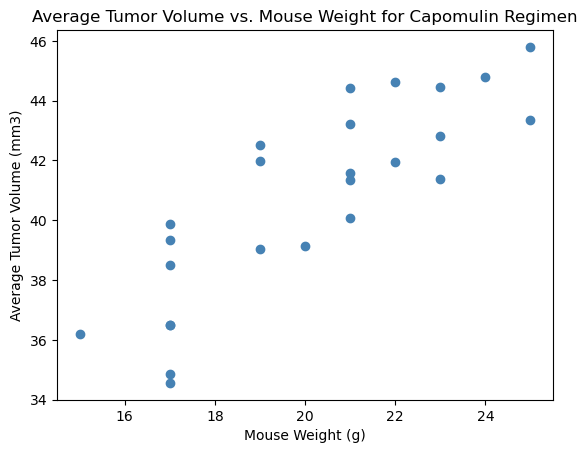

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_results = clean_mice_results[clean_mice_results['Drug Regimen'] == 'Capomulin']

capomulin_data = capomulin_results.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

x_values = capomulin_data['Weight (g)']
y_values = capomulin_data['Tumor Volume (mm3)']
plt.scatter(x_values, y_values, color ='steelblue')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coeff, p_value = st.pearsonr(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])

print(f"Correlation coefficient: {corr_coeff:.2f}")

Correlation coefficient: 0.84


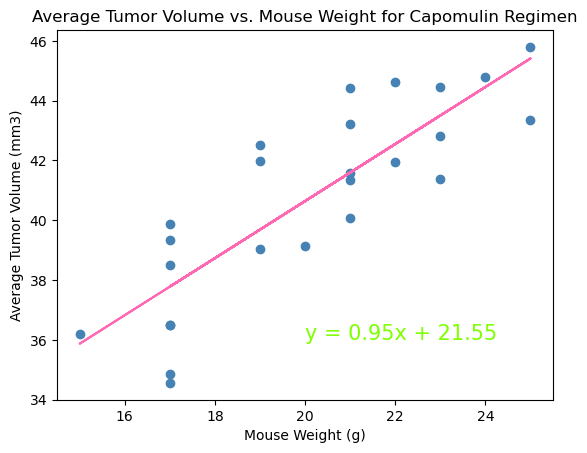

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"hotpink")
plt.annotate(line_eq,(20,36),fontsize=15,color="chartreuse")

plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()